In [1]:
from TopML.Manifolds.Grassmann import GrassmannCanonical
from TopML.Manifolds.utils import pairwise_distance
from jax import numpy as jnp
import jax
from jax.scipy.linalg import sqrtm
from jax.scipy.linalg import qr
from jax import jit
from functools import partial
from jax import vmap, lax, jit
from jax import grad, jacobian, custom_vjp
import numpy as np

N = 10
gr = GrassmannCanonical(5, 2)

point = gr.random_point(1)
set_of_points = gr.random_point(4, N)
print(pairwise_distance(point, set_of_points, gr))

dy = grad(pairwise_distance, argnums=0)
# distances = vmap(pairwise_distance, (0, None, None), 0)(set_of_points, set_of_points, gr)

for i in range(100):
    print(pairwise_distance(point, set_of_points, gr))
    anti_gradient = gr.egrad_to_rgrad(point, -dy(point, set_of_points, gr))
    point = gr.retr(point, anti_gradient)
"""
print(dy(point, set_of_points, gr))
dy_projected = lambda x, X: gr.project(x, dy(x, X, gr))
dy_projected_trace = lambda x, X: jnp.trace(gr.project(x, dy(x, X, gr)))

d2yy = jnp.squeeze(jacobian(dy_projected_trace, argnums=0)(point, set_of_points))
print(d2yy)"""


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


1.4670001
1.4670001
1.4309233
1.402831
1.3454031
1.3137838
1.2573241
1.1499995
1.1182344
1.0644703
1.0299509
1.0240501
1.0224984
1.0220656
1.0219413
1.0219042
1.021892
1.0218886
1.0218873
1.0218872
1.021887
1.0218871
1.021887
1.0218871
1.0218868
1.0218868
1.021887
1.0218868
1.021887
1.0218871
1.0218868
1.021887
1.0218868
1.0218871
1.0218868
1.0218868
1.0218867
1.0218867
1.0218868
1.0218867
1.021887
1.0218868
1.0218868
1.0218867
1.021887
1.0218868
1.0218868
1.0218871
1.0218868
1.0218868
1.0218868
1.021887
1.021887
1.0218868
1.0218868
1.0218868
1.021887
1.0218868
1.0218868
1.0218868
1.0218871
1.021887
1.0218868
1.0218871
1.021887
1.021887
1.0218871
1.021887
1.021887
1.0218868
1.0218868
1.0218868
1.021887
1.0218868
1.021887
1.021887
1.0218868
1.021887
1.021887
1.0218871
1.0218868
1.021887
1.021887
1.0218871
1.021887
1.0218868
1.0218868
1.0218868
1.0218871
1.021887
1.0218868
1.0218871
1.021887
1.021887
1.0218868
1.0218871
1.021887
1.021887
1.021887
1.021887
1.0218868


'\nprint(dy(point, set_of_points, gr))\ndy_projected = lambda x, X: gr.project(x, dy(x, X, gr))\ndy_projected_trace = lambda x, X: jnp.trace(gr.project(x, dy(x, X, gr)))\n\nd2yy = jnp.squeeze(jacobian(dy_projected_trace, argnums=0)(point, set_of_points))\nprint(d2yy)'

In [44]:
Frame = np.array([[1, 0, 0, 0], [0, 1, 0, 0]]).T
Frame.shape

(4, 2)

In [45]:
N = 61
SO1 = np.zeros((N, 4, 4))

for i, phi in enumerate(range(0, N)):
    phi = (phi + 1) / 360 * 2 * np.pi
    SO1[i] = np.array([
        [np.cos(phi), -np.sin(phi), 0, 0],
        [np.sin(phi), np.cos(phi), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    
SO2 = np.zeros((N, 4, 4))

for i, phi in enumerate(range(0, N)):
    phi = (phi + 1) / 360 * 2 * np.pi
    SO2[i] = np.array([
        [1, 0, 0, 0],
        [0, np.cos(phi), -np.sin(phi), 0],
        [0, np.sin(phi), np.cos(phi), 0],
        [0, 0, 0, 1]
    ])
Frame_rot = np.zeros((N, Frame.shape[0], Frame.shape[1]))

for i, so in enumerate(SO1):
    Frame_rot[i] = SO2[i].dot(SO1[i].dot(Frame))
    
sought_for_mean_idx = int(Frame_rot.shape[0] / 2)
    
Frame_rot.shape

(61, 4, 2)

In [25]:
Frame_rot[0]

array([[ 9.99847695e-01, -1.74524064e-02],
       [ 1.74497484e-02,  9.99695414e-01],
       [ 3.04586490e-04,  1.74497484e-02],
       [ 0.00000000e+00,  0.00000000e+00]])

ValueError: too many values to unpack (expected 3)

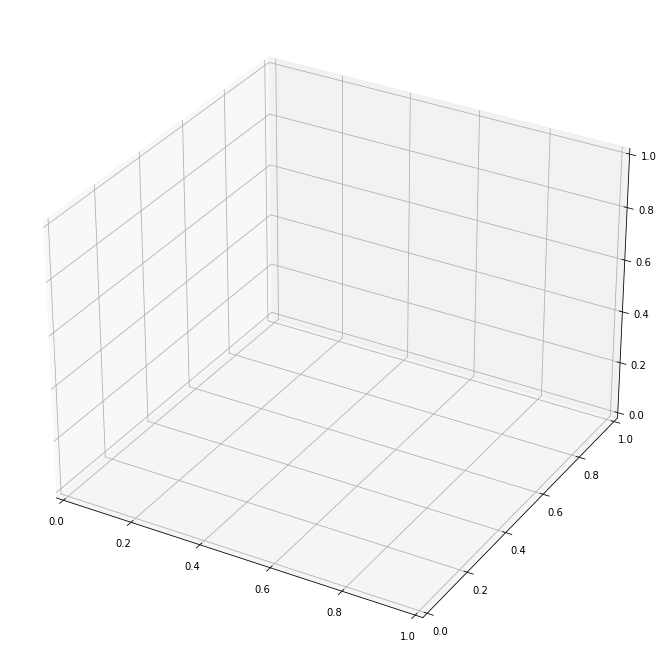

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

origin = [0,0,0]

for i, frame_rot in enumerate(Frame_rot):
    X, Y, Z = zip(origin, origin) 
    U, V, W = zip(frame_rot.T[0], frame_rot.T[1])
    c = "blue"
    alpha = 0.15
    label = None
    if i == sought_for_mean_idx:
        c = "red"
        alpha = 1
        label = "True mean"
    ax.quiver(X,Y,Z,U,V,W, color=c, alpha=alpha, arrow_length_ratio=0.075, label=label)

ax.set_xlim([0,1.0])
ax.set_ylim([0,1.0])
ax.set_zlim([0,1.0])
ax.view_init(30, 30)
ax.legend()

plt.show()

In [12]:

gr = GrassmannCanonical(4, 2)

point = gr.random_point(1)
set_of_points = Frame_rot
print(pairwise_distance(point, set_of_points, gr))

dy = grad(pairwise_distance, argnums=0)
# distances = vmap(pairwise_distance, (0, None, None), 0)(set_of_points, set_of_points, gr)

for i in range(10):
    print(pairwise_distance(point, set_of_points, gr))
    anti_gradient = -dy(point, set_of_points, gr)
    print(anti_gradient)
    point = gr.retr(point, anti_gradient)
    print(point)


NameError: name 'Frame_rot' is not defined

In [23]:
gr = GrassmannCanonical(4, 2)
pairwise_distance(gr.random_point(1), gr.random_point(4,10), gr, test=True)

[1.4138625  1.5190898  1.2713977  1.5061128  0.97367066 1.3862157
 1.1851966  0.5571526  1.2455708  0.8521399 ]


Array(1.191041, dtype=float32)

In [24]:
grad(pairwise_distance, argnums=0)(gr.random_point(1), gr.random_point(4,10), gr)

Array([[ 0.1743917 ,  0.21907435],
       [ 0.39662212,  0.34952897],
       [-0.25578403, -0.26603463],
       [ 0.49781576, -0.50541437]], dtype=float32)

In [25]:
gr.dist(gr.random_point(0), gr.random_point(0))

Array(0., dtype=float32)

In [16]:
pairwise_distance(point,jnp.array(Frame_rot),gr)

Array(nan, dtype=float32)

In [10]:
jnp.array(Frame_rot)

Array([[[ 9.99847710e-01, -1.74524058e-02],
        [ 1.74497478e-02,  9.99695420e-01],
        [ 3.04586487e-04,  1.74497478e-02]],

       [[ 9.99390841e-01, -3.48994955e-02],
        [ 3.48782353e-02,  9.98782039e-01],
        [ 1.21797482e-03,  3.48782353e-02]],

       [[ 9.98629510e-01, -5.23359552e-02],
        [ 5.22642322e-02,  9.97260928e-01],
        [ 2.73905229e-03,  5.22642322e-02]],

       [[ 9.97564077e-01, -6.97564706e-02],
        [ 6.95865527e-02,  9.95134056e-01],
        [ 4.86596581e-03,  6.95865527e-02]],

       [[ 9.96194720e-01, -8.71557444e-02],
        [ 8.68240893e-02,  9.92403865e-01],
        [ 7.59612350e-03,  8.68240893e-02]],

       [[ 9.94521916e-01, -1.04528464e-01],
        [ 1.03955843e-01,  9.89073813e-01],
        [ 1.09262001e-02,  1.03955843e-01]],

       [[ 9.92546141e-01, -1.21869341e-01],
        [ 1.20960951e-01,  9.85147834e-01],
        [ 1.48521373e-02,  1.20960951e-01]],

       [[ 9.90268052e-01, -1.39173105e-01],
        [ 1.378186